# **Project Name**    -



##### **Project Type**    - EDA and Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**-Chetan Gode


# **Project Summary -**

                Rossmann operates over 3000 drug store in 7 European countries. Currently Rossmann Store Manager are tasked with predicting their daily sales for up to six week in advance. Store sales are influenced by many factors, including Promotions,Competition, School and State holidays,Seasonality and locality.with thousand individual managers predicting sales based on their unique circumstances,the accuracy of results can be quite varied. 
                we have provided with historical sales data fo 1115 rossmann store and task is to forecast Sales

# **GitHub Link -**

https://github.com/chetansgode/Rossmann_Retail_Sales_prediction.git


# **Problem Statement**


* **we have provided with historical sales data for 1115 rossmann store and task is to forecast Sales and note that some store in dataset were temporary closed for refurbishment.**

### **Define Your Business Objective?**
  

Answer Here.
* To predict accurate Sales from historical data with considering all influenced factor that directly affect sales or demands.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
%lsmagic
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
df_store=pd.read_csv('C:/Users/Admin/Downloads/store (1).csv')
df_sales=pd.read_csv('C:/Users/Admin/Downloads/Rossmann Stores Data (1).csv',parse_dates=['Date'])

### Dataset First View

In [3]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

print(df_store.shape)
print(df_sales.shape)


(1115, 10)
(1017209, 9)


### Dataset Information

In [6]:
# Dataset Info
df_store.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


#### Duplicate Values

In [8]:
df_store.duplicated().sum()

0

In [9]:
df_sales.duplicated().sum()

0

#### Missing Values/Null Values

### for store data 

In [10]:
df_store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
#to remove above mention none value, checking data and to replace appropriate data in it

for i in df_store.columns:
    print(df_store[i].value_counts())

1       1
742     1
748     1
747     1
746     1
       ..
378     1
379     1
380     1
381     1
1115    1
Name: Store, Length: 1115, dtype: int64
a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64
a    593
c    513
b      9
Name: Assortment, dtype: int64
250.0     12
1200.0     9
190.0      8
350.0      8
50.0       8
          ..
4490.0     1
8970.0     1
9720.0     1
5290.0     1
1880.0     1
Name: CompetitionDistance, Length: 654, dtype: int64
9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64
2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: in

In [12]:
#change into int type
print('before ',df_sales['StateHoliday'].unique())
df_sales['StateHoliday'].replace({'0':0}, inplace=True)
df_sales['StateHoliday'].unique()

before  ['0' 'a' 'b' 'c' 0]


array([0, 'a', 'b', 'c'], dtype=object)

In [13]:
df_store['CompetitionDistance'].fillna(np.mean(df_store['CompetitionDistance']),inplace=True)

In [14]:
#replace all other none value with 0
df_store.fillna(0,inplace=True)

In [15]:
df_store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### for Sales data

In [16]:
df_sales.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
print(list(df_sales.columns))
print(list(df_store.columns))

['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


###  Dataset Describe

In [18]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5404.901079,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,7652.849306,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2330.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [19]:
df_sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Merge two data set

In [20]:
df=df_store.merge(df_sales,how='left',on='Store')

In [21]:
df.shape

(1017209, 18)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1017209 non-null  float64       
 4   CompetitionOpenSinceMonth  1017209 non-null  float64       
 5   CompetitionOpenSinceYear   1017209 non-null  float64       
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  float64       
 8   Promo2SinceYear            1017209 non-null  float64       
 9   PromoInterval              1017209 non-null  object        
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

In [23]:
df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.430020e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,7.705298e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Check Unique Values for each variable.

In [24]:
for num,col in enumerate(df):
    if col not in ['Store','CompetitionDistance','Date']:  # ignore these two column just for easy visualisation there has two many row so..
        
        print(num+1, col, 'Columns has no. of unique value : \n',df[col].unique(), ',\n Total unique value : \n',df[col].nunique(),'\n Count each values : \n',df[col].value_counts())
       

2 StoreType Columns has no. of unique value : 
 ['c' 'a' 'd' 'b'] ,
 Total unique value : 
 4 
 Count each values : 
 a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64
3 Assortment Columns has no. of unique value : 
 ['a' 'c' 'b'] ,
 Total unique value : 
 3 
 Count each values : 
 a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
5 CompetitionOpenSinceMonth Columns has no. of unique value : 
 [ 9. 11. 12.  4. 10.  8.  0.  3.  6.  5.  1.  2.  7.] ,
 Total unique value : 
 13 
 Count each values : 
 0.0     323348
9.0     114254
4.0      87076
11.0     84455
3.0      63548
7.0      59434
12.0     57896
10.0     55622
6.0      45444
5.0      39608
2.0      37886
8.0      36186
1.0      12452
Name: CompetitionOpenSinceMonth, dtype: int64
6 CompetitionOpenSinceYear Columns has no. of unique value : 
 [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.    0. 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.] 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [25]:
df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,1,0,1


In [26]:
df.describe().columns

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday'],
      dtype='object')

### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [27]:
a=df.groupby('Store')['Sales'].mean().sort_values(ascending=False)[:20]
a

Store
262     20718.515924
817     18108.139066
562     17969.556263
1114    17200.196391
251     15814.087049
842     15242.114776
513     15129.942675
788     14949.194268
733     14933.288747
383     14320.466030
756     13706.774947
335     13313.939490
698     12953.577495
523     12925.684713
595     12499.980892
586     12465.393843
320     12346.303609
380     11955.070064
544     11670.604034
1033    11539.564756
Name: Sales, dtype: float64

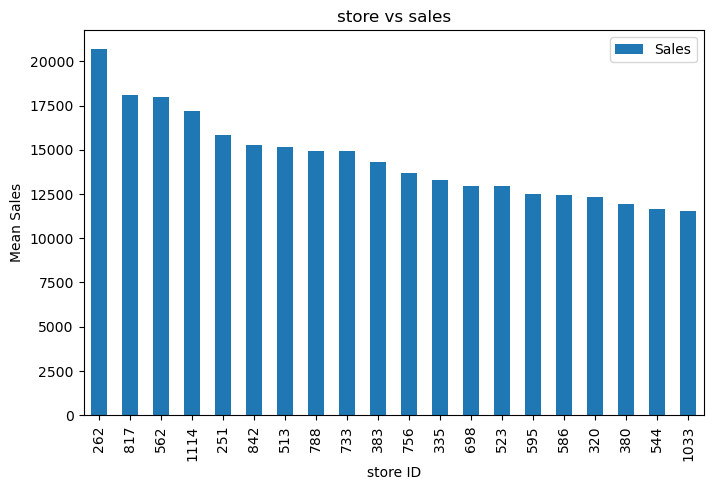

In [28]:
plt.figure(figsize=(8,5))
a.plot(kind='bar')
plt.title('store vs sales')
plt.xlabel('store ID')
plt.ylabel('Mean Sales')
plt.legend()

In [29]:
a=df.groupby('Store')['Sales'].mean().sort_values(ascending=True)[:20]
a

Store
307    2244.503185
543    2313.468153
198    2407.933121
208    2443.791932
841    2461.395966
254    2485.839703
972    2550.559448
794    2553.475584
219    2591.467091
210    2641.309979
425    2667.116773
656    2690.546709
558    2697.829087
435    2710.532909
703    2721.152866
970    2732.457537
232    2742.272824
837    2769.389597
789    2787.971338
969    2807.979830
Name: Sales, dtype: float64

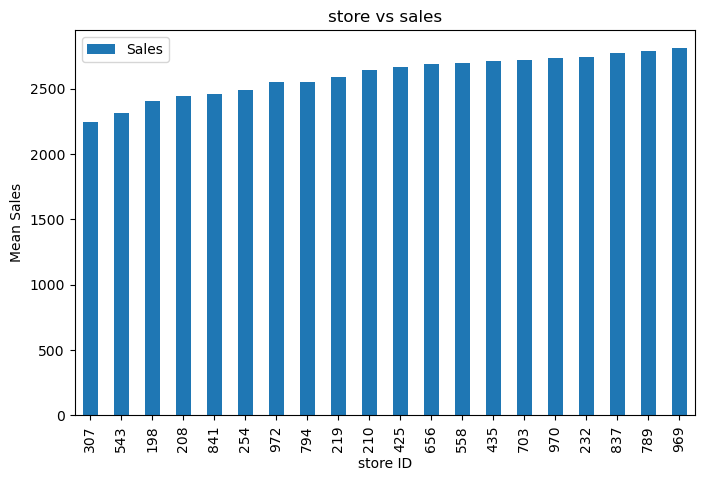

In [30]:
plt.figure(figsize=(8,5))
a.plot(kind='bar')
plt.title('store vs sales')
plt.xlabel('store ID')
plt.ylabel('Mean Sales')
plt.legend()

##### 1. Why did you pick the specific chart?

Answer Here.
* Just because to compare maximum and minimum average sales visualization

##### 2. What is/are the insight(s) found from the chart?

Answer Here
*   store_id : 262      has maximum average sales 20718.515924
*   store_id : 307      has minimum average sales  2244.503185


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
* yes It is showing that max and min sales from store 

#### Chart - 2

In [31]:
a=df.groupby(['StoreType','Assortment'])['Sales'].mean().unstack()
a

Assortment,a,b,c
StoreType,,,
a,5398.858310,NaN,6310.867032
b,10821.619806,8553.931999,17969.556263
c,5647.174314,NaN,5805.782193
d,5317.885943,NaN,5826.407660


Text(0, 0.5, 'mean sales')

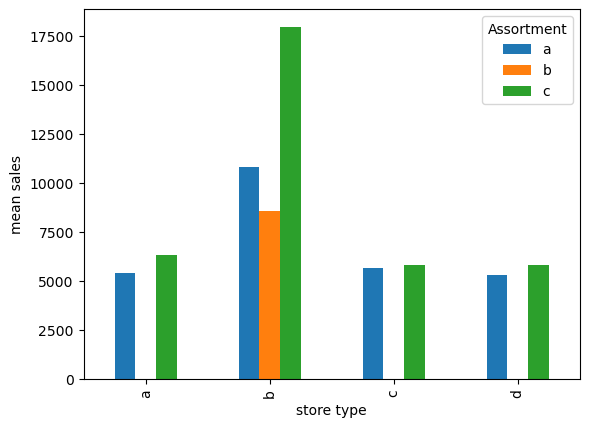

In [32]:
a.plot(kind='bar')
plt.xlabel('store type')
plt.ylabel('mean sales')


##### 1. Why did you pick the specific chart?

Answer Here.
* To check assortment at every store

##### 2. What is/are the insight(s) found from the chart?

Answer Here
* Only one store('b') has assortment "b" sales present.  
* Types 'c' assortment has been highest sales among all assortment at every store.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
* Yes, assortment types 'b' has not sold in many store

#### Chart - 3

2 StoreType Columns has no. of unique value : 
 ['c' 'a' 'd' 'b'] ,
 Total unique value : 
 4 
 Count each values : 
 a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64


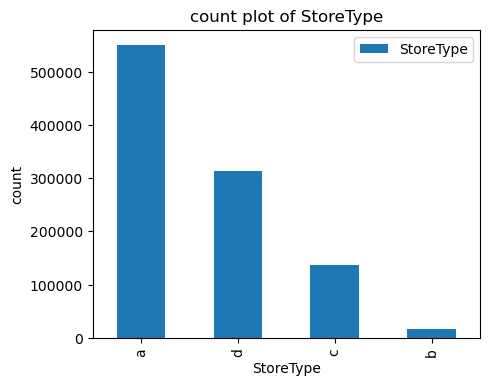

3 Assortment Columns has no. of unique value : 
 ['a' 'c' 'b'] ,
 Total unique value : 
 3 
 Count each values : 
 a    537445
c    471470
b      8294
Name: Assortment, dtype: int64


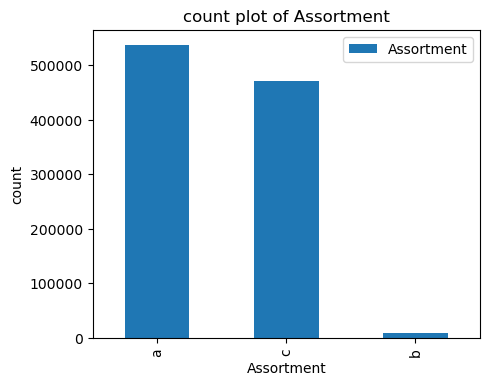

5 CompetitionOpenSinceMonth Columns has no. of unique value : 
 [ 9. 11. 12.  4. 10.  8.  0.  3.  6.  5.  1.  2.  7.] ,
 Total unique value : 
 13 
 Count each values : 
 0.0     323348
9.0     114254
4.0      87076
11.0     84455
3.0      63548
7.0      59434
12.0     57896
10.0     55622
6.0      45444
5.0      39608
2.0      37886
8.0      36186
1.0      12452
Name: CompetitionOpenSinceMonth, dtype: int64


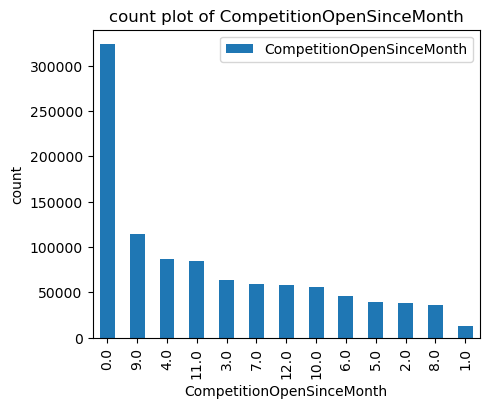

6 CompetitionOpenSinceYear Columns has no. of unique value : 
 [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.    0. 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.] ,
 Total unique value : 
 24 
 Count each values : 
 0.0       323348
2013.0     75426
2012.0     74299
2014.0     63732
2005.0     56564
2010.0     51258
2011.0     49396
2009.0     49396
2008.0     48476
2007.0     43744
2006.0     42802
2015.0     35060
2002.0     24882
2004.0     19804
2003.0     16794
2001.0     14704
2000.0      9236
1999.0      7352
1990.0      4710
1994.0      1884
1995.0      1700
1961.0       942
1998.0       942
1900.0       758
Name: CompetitionOpenSinceYear, dtype: int64


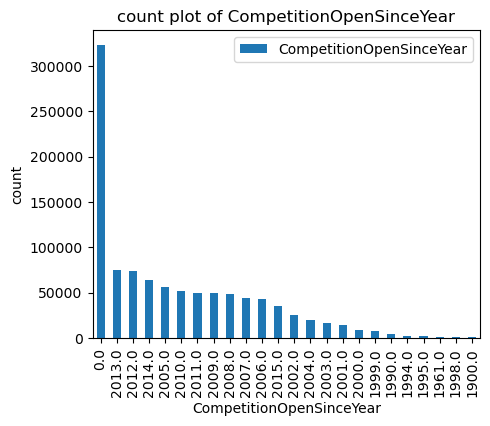

7 Promo2 Columns has no. of unique value : 
 [0 1] ,
 Total unique value : 
 2 
 Count each values : 
 1    509178
0    508031
Name: Promo2, dtype: int64


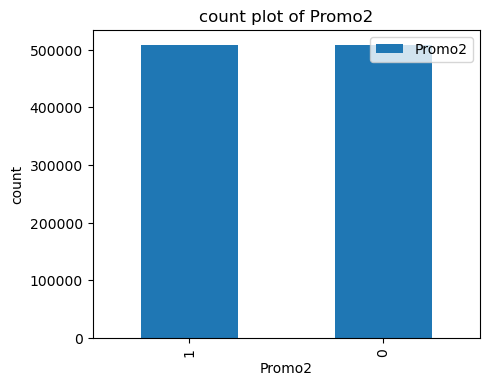

8 Promo2SinceWeek Columns has no. of unique value : 
 [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.] ,
 Total unique value : 
 25 
 Count each values : 
 0.0     508031
14.0     72990
40.0     62598
31.0     39976
10.0     38828
5.0      35818
37.0     32786
1.0      32418
13.0     29820
45.0     29268
22.0     28694
18.0     27318
35.0     22814
9.0      12452
27.0      9626
36.0      9236
48.0      8294
39.0      4732
23.0      4342
44.0      2642
6.0        942
26.0       942
50.0       942
28.0       942
49.0       758
Name: Promo2SinceWeek, dtype: int64


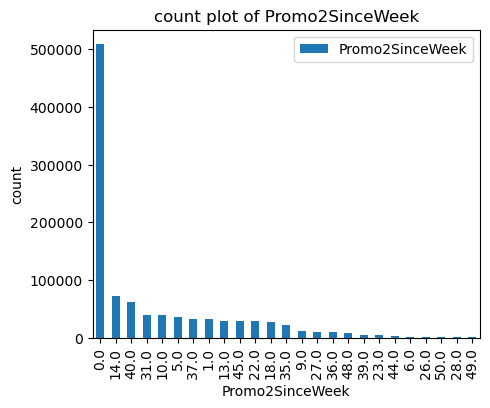

9 Promo2SinceYear Columns has no. of unique value : 
 [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.] ,
 Total unique value : 
 8 
 Count each values : 
 0.0       508031
2011.0    115056
2013.0    110464
2014.0     79922
2012.0     73174
2009.0     65270
2010.0     56240
2015.0      9052
Name: Promo2SinceYear, dtype: int64


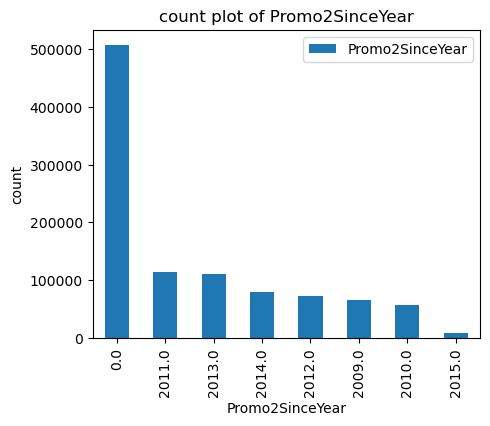

10 PromoInterval Columns has no. of unique value : 
 [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec'] ,
 Total unique value : 
 4 
 Count each values : 
 0                   508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64


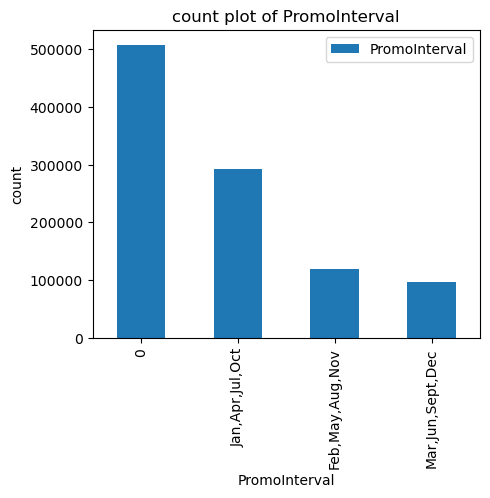

11 DayOfWeek Columns has no. of unique value : 
 [5 4 3 2 1 7 6] ,
 Total unique value : 
 7 
 Count each values : 
 5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64


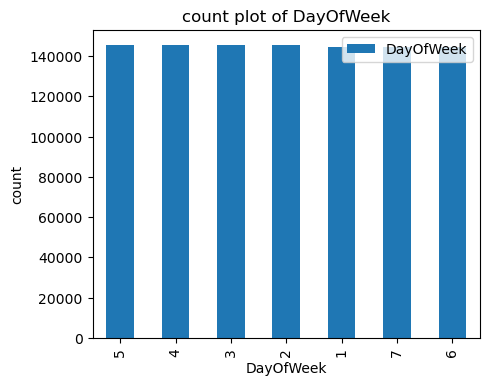

13 Sales Columns has no. of unique value : 
 [ 5263  5020  4782 ... 20362 18841 21237] ,
 Total unique value : 
 21734 
 Count each values : 
 0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
19268         1
18344         1
17685         1
19544         1
21237         1
Name: Sales, Length: 21734, dtype: int64


KeyboardInterrupt: 

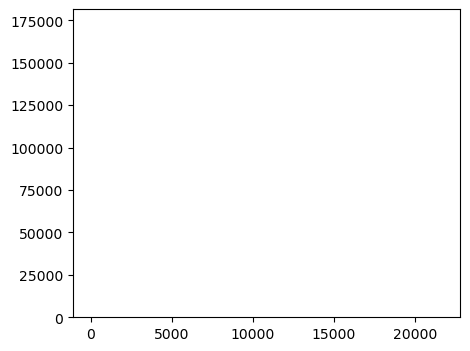

In [33]:
for num,col in enumerate(df):
    if col not in ['Store','CompetitionDistance','Date']:  # ignore these two column just for easy visualisation there has two many row so..
        
        print(num+1, col, 'Columns has no. of unique value : \n',df[col].unique(), ',\n Total unique value : \n',df[col].nunique(),'\n Count each values : \n',df[col].value_counts())
        plt.figure(figsize=(5,4))
        df[col].value_counts().plot(kind='bar')
        plt.title('count plot of ' +str(col))
        plt.xlabel(col)
        plt.ylabel('count')
        plt.legend()
        plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
* Easily visualized the data distribution

##### 2. What is/are the insight(s) found from the chart?

Answer Here
* store type 'a' has highest and 'b' has lowest store type in data and same pattern for assortment.
* competitionOpenSinceMonth has lowest from 1 month and highest in for 9 month and there is no competition 30k+ store
* Maximum store have no competition yet but competition increases with yr.
* Promo2 is running appro. same 



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code :-plot bar chart all variable vs sales

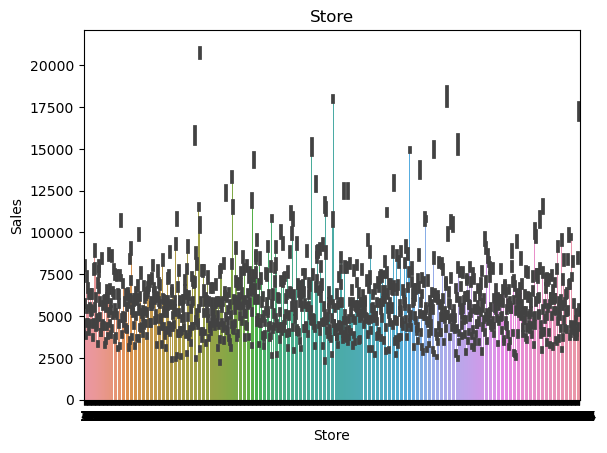

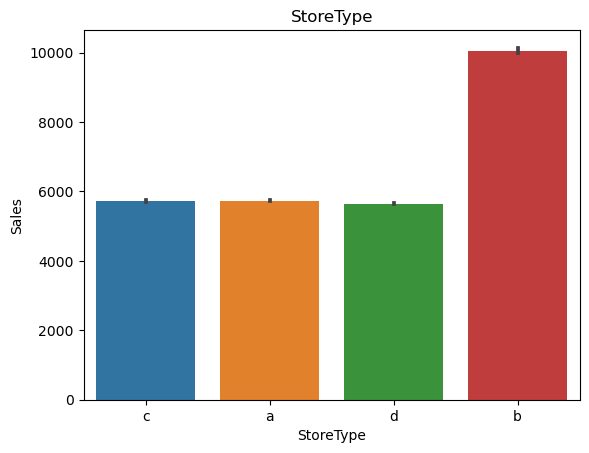

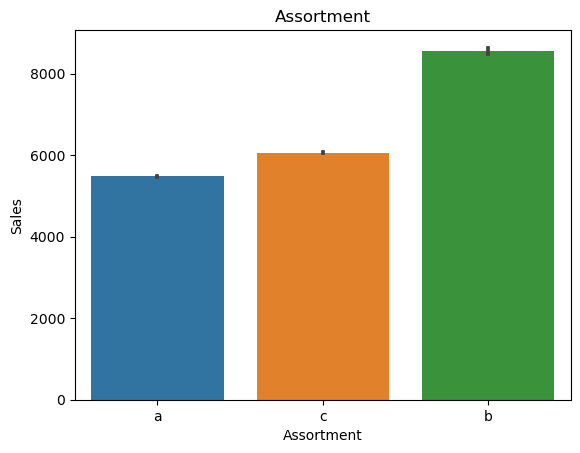

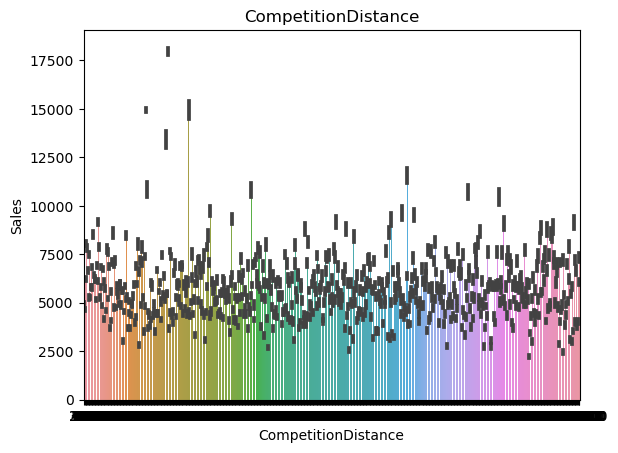

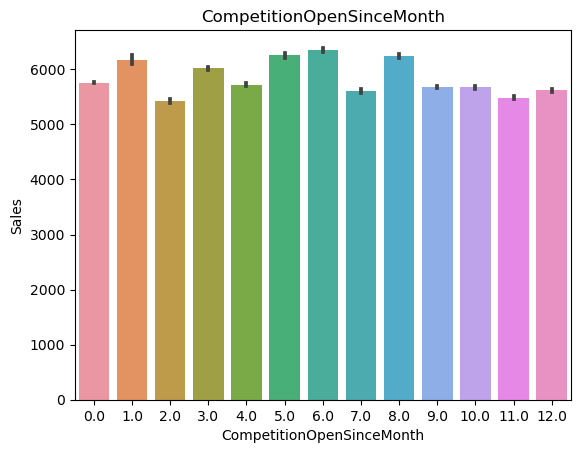

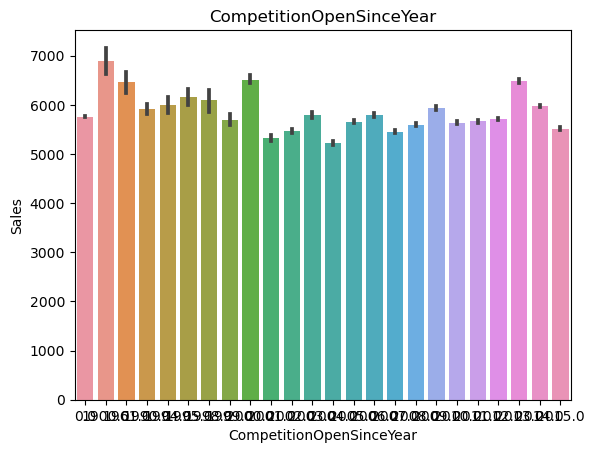

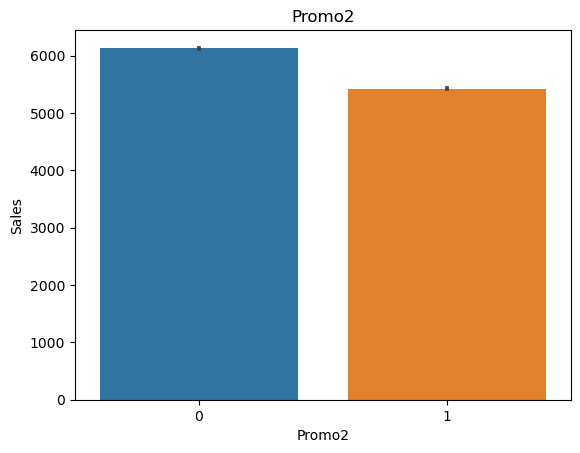

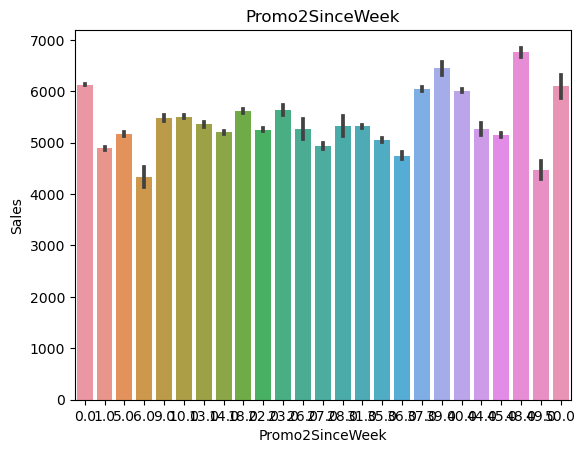

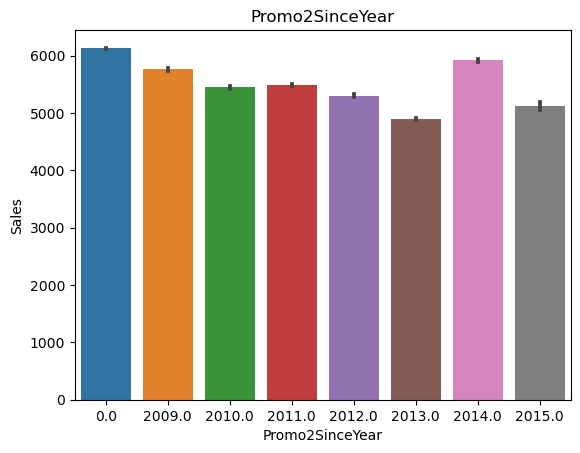

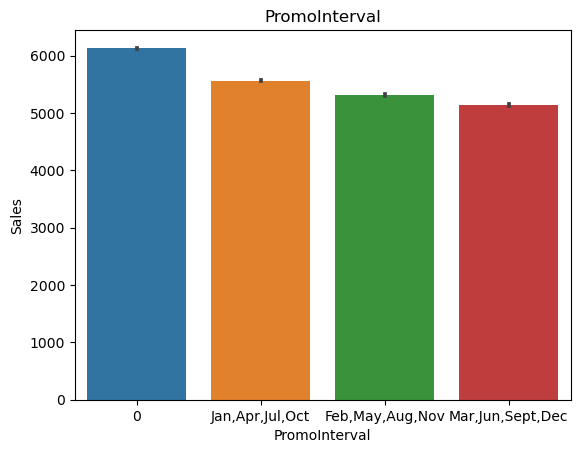

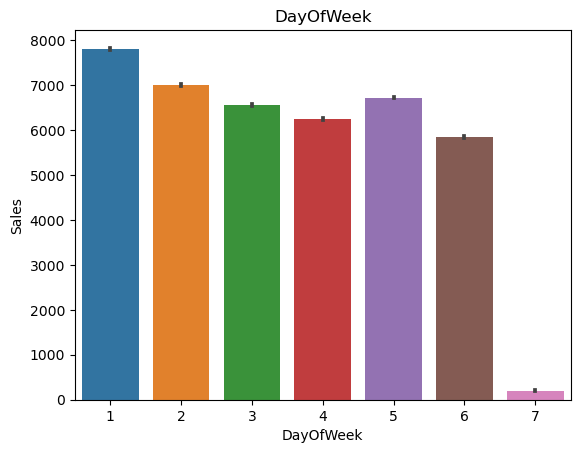

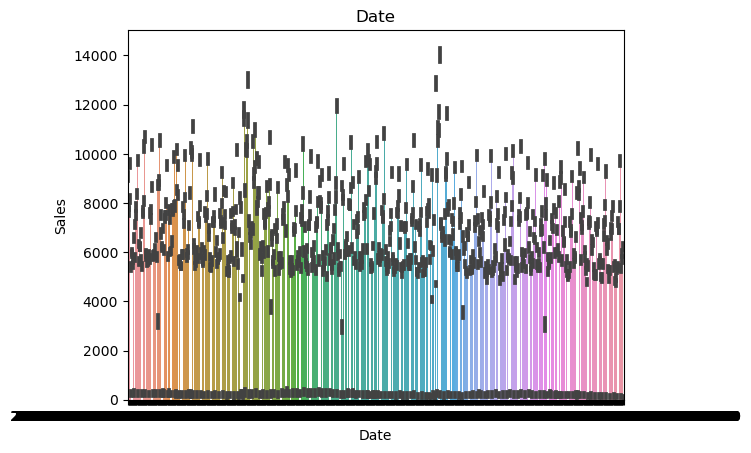

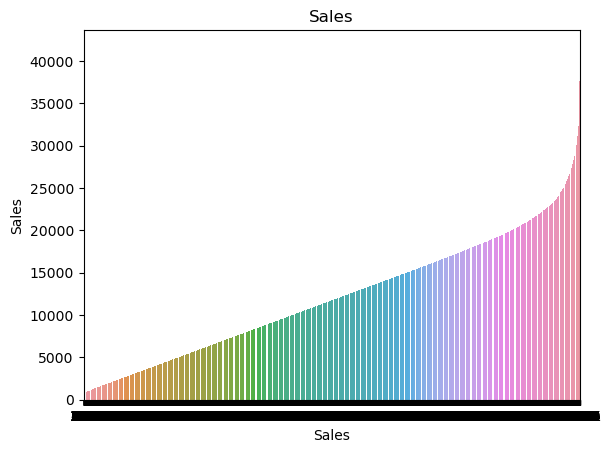

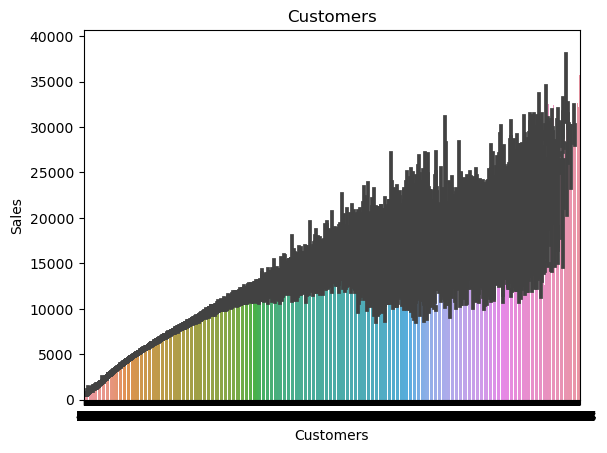

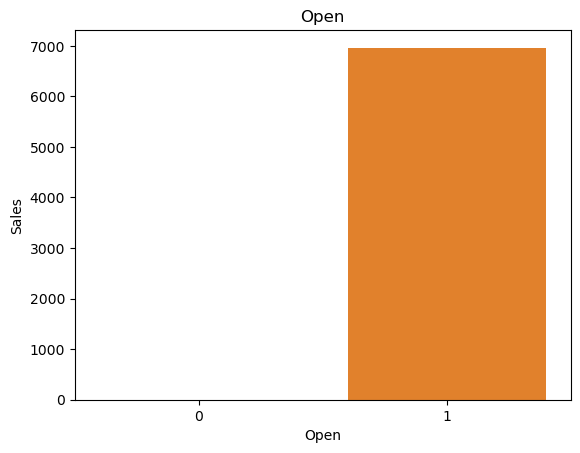

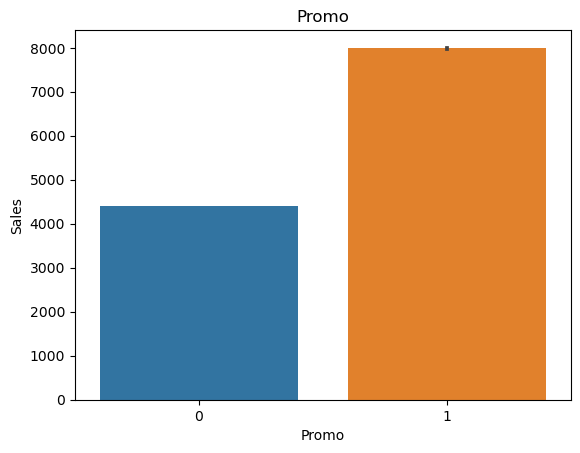

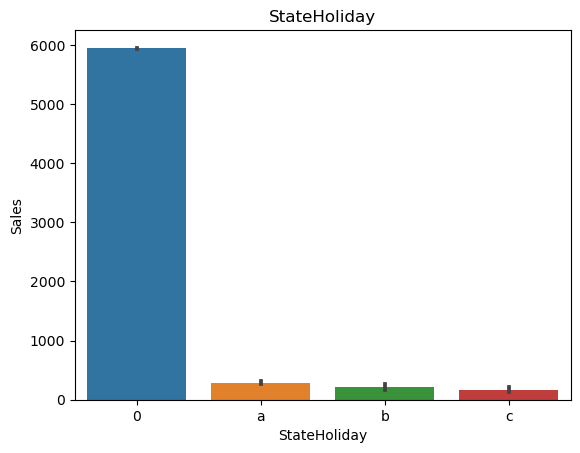

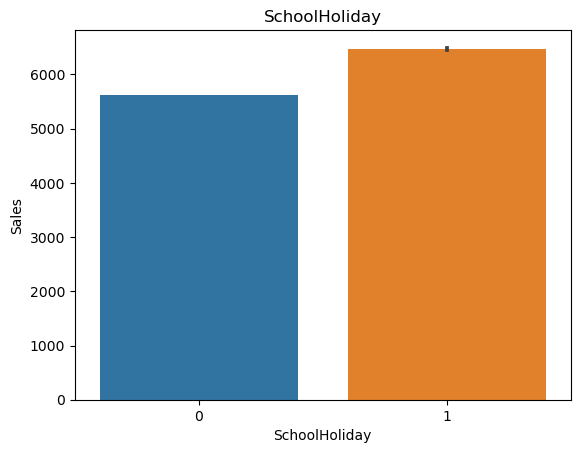

In [35]:
for i in df.columns:
    plt.figure(figsize=(10,4))
    sns.barplot(df[i],df['Sales'])
    plt.title(i)
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
* to find sales with respect to each variable

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [83]:
# Chart - 5 visualization code :- check competition distance vs sales 

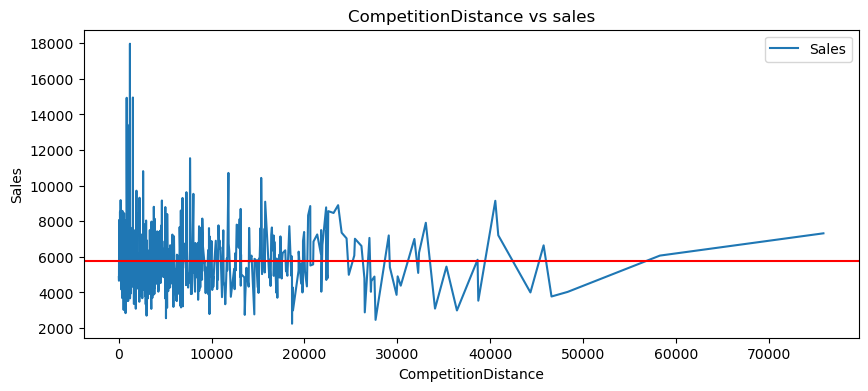

In [84]:
plt.figure(figsize=(10,4))
fi=df.groupby('CompetitionDistance')['Sales'].mean().plot(kind='line')
fi.axhline(df['Sales'].mean(),color='Red')
plt.xlabel('CompetitionDistance')
plt.ylabel('Sales')
plt.title('CompetitionDistance vs sales')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.
* To check competition distance vs sales trend 

##### 2. What is/are the insight(s) found from the chart?

Answer Here
* There is higher sales when competition distance less

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code :-

In [85]:
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

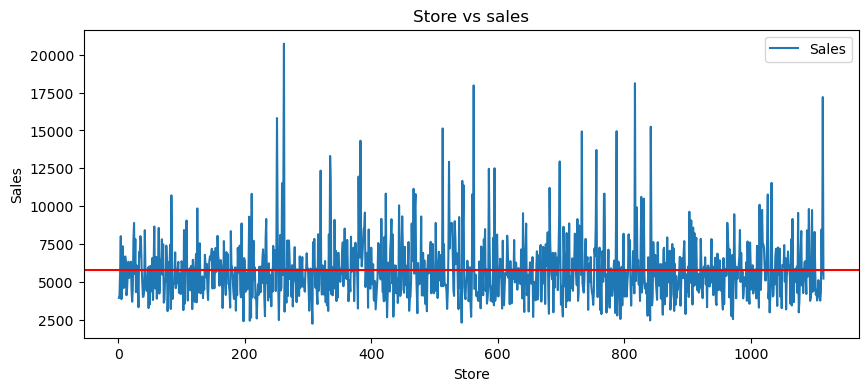

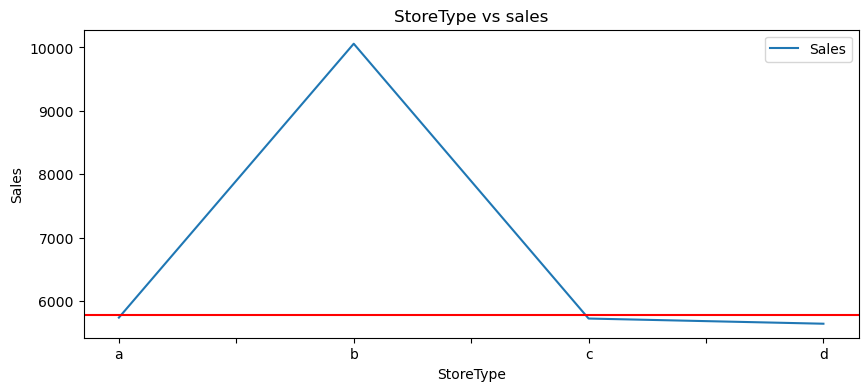

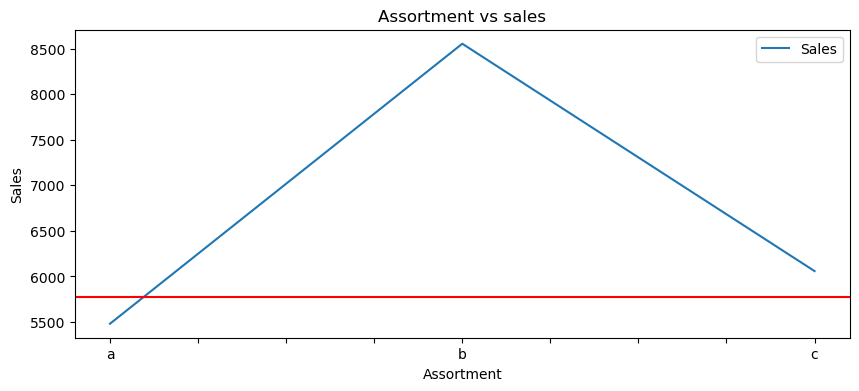

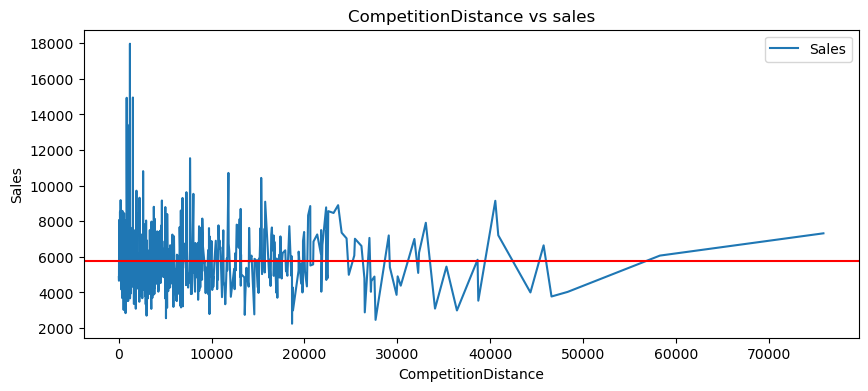

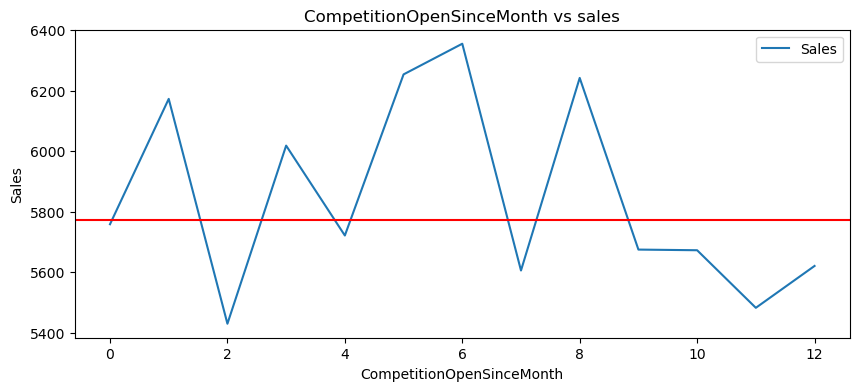

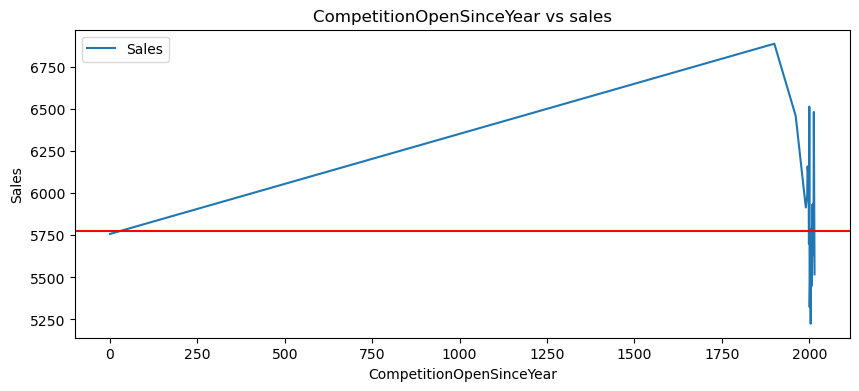

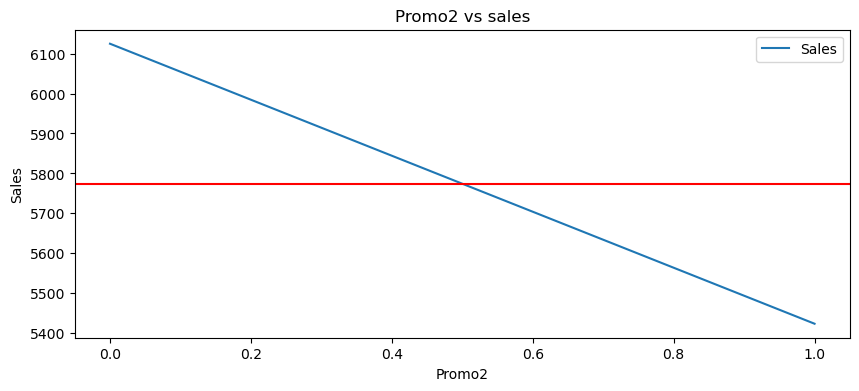

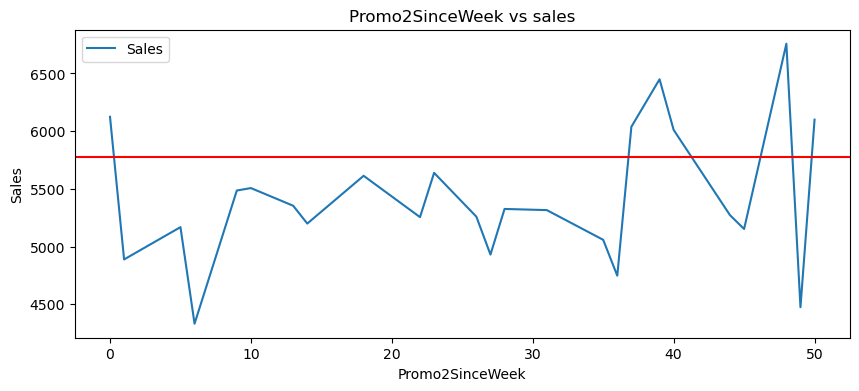

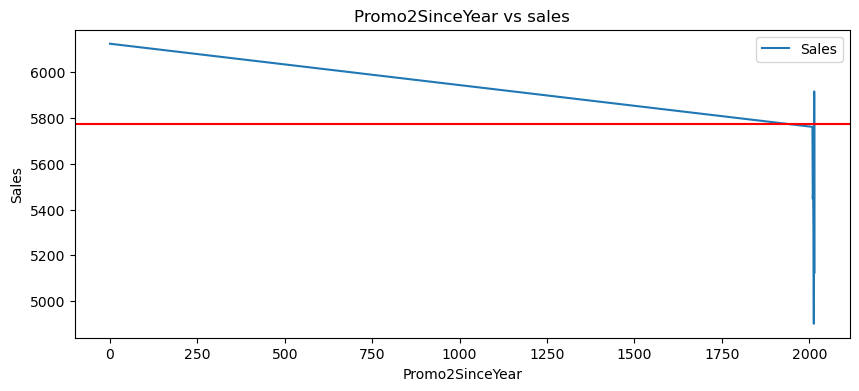

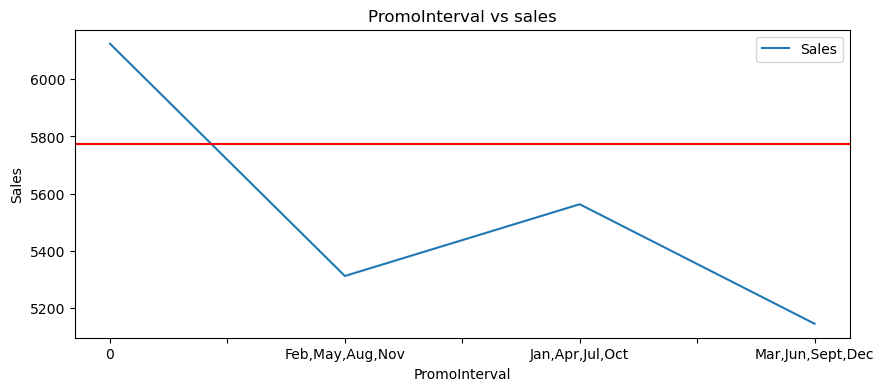

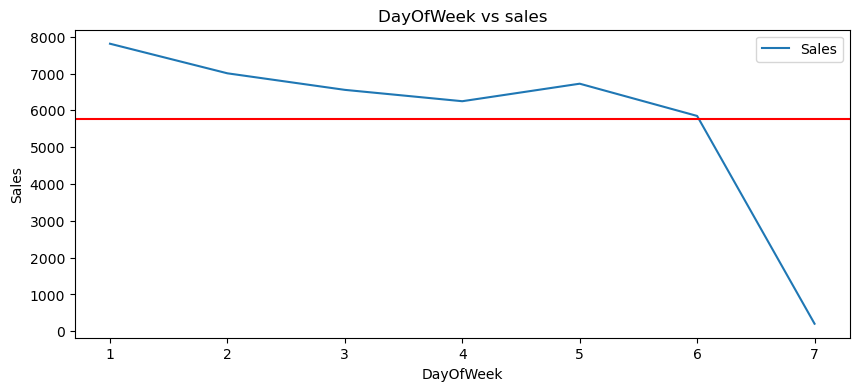

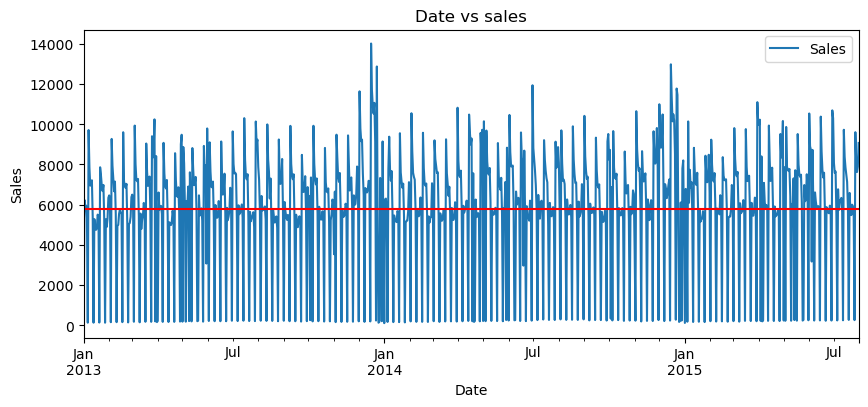

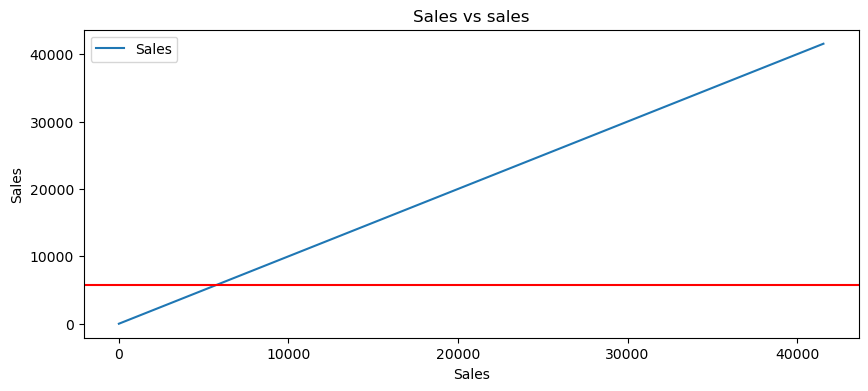

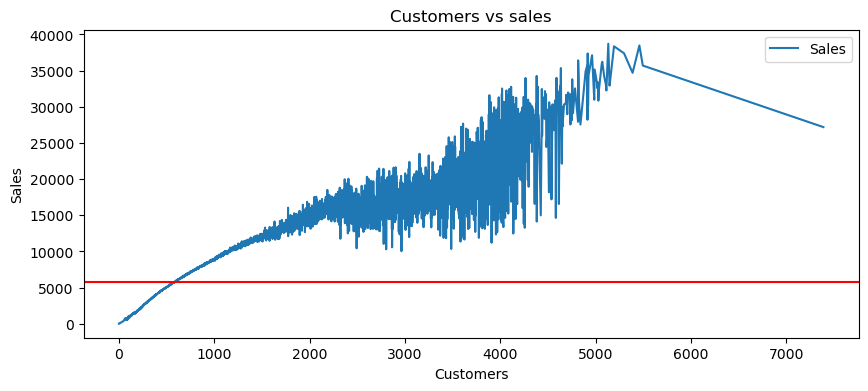

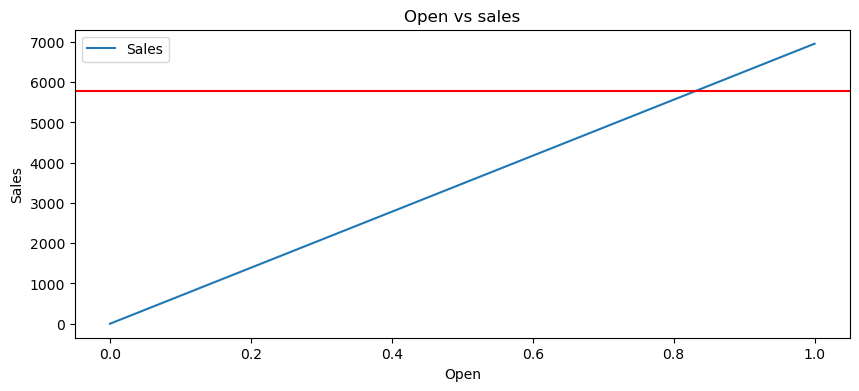

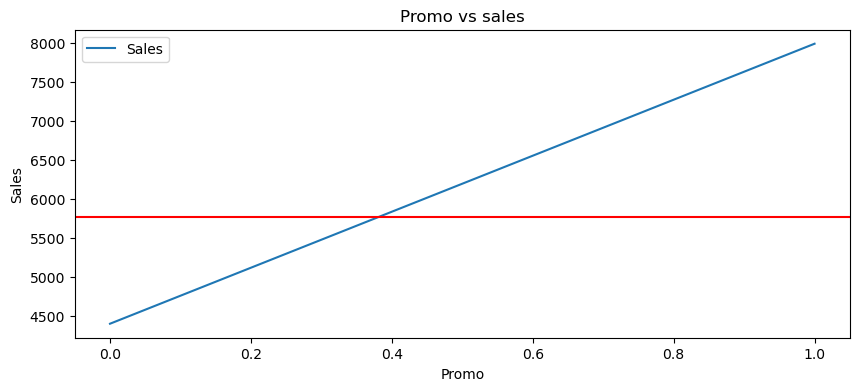

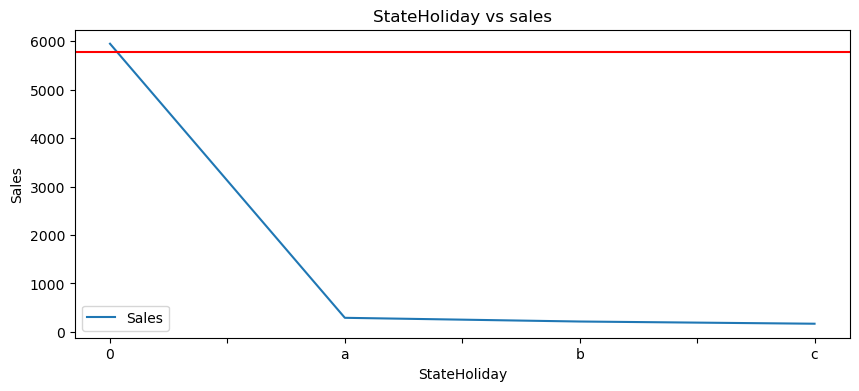

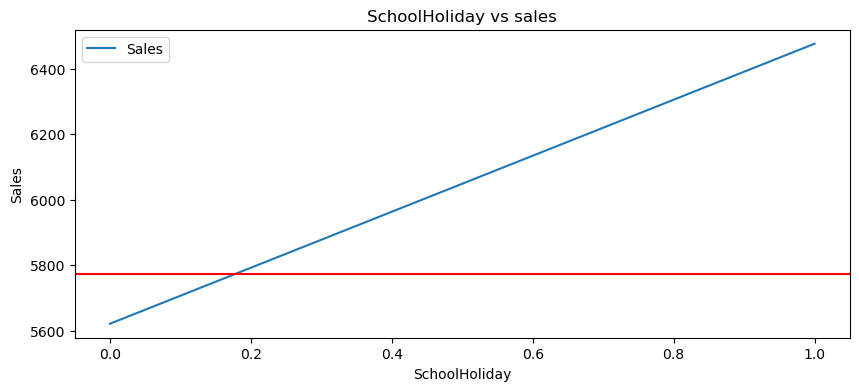

In [89]:
for i in df.columns:
    plt.figure(figsize=(10,4))
    fi=df.groupby(i)['Sales'].mean().plot(kind='line')
    fi.axhline(df['Sales'].mean(),color='Red')
    plt.xlabel(i)
    plt.ylabel('Sales')
    plt.title(str(i)+ ' vs sales')
    plt.legend()
    plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***